# Машинное обучение, DS-поток
## Домашнее задание 1

**Правила:**

* Дедлайн **21 декабря 10:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[ml] Фамилия Имя - задание 1"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  5 баллов
* Задача 2 -  5 баллов
* Задача 3 -  10 баллов

### Задача 1.

Пусть $\widehat{\theta}$ --- оценка коэффициентов линейной модели в методе ридж-регрессии.
* Посчитайте $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^T\left(\widehat{\theta} - \theta\right)$.
* Покажите, что в отличии от МНК вектор оценок отклика $\widehat{Y}$ на обучающей выборке в методе ридж-регрессии не перпендикулярен остаткам модели $\widehat{e} = Y  - \widehat{Y}$.

### Решение.

Посчитать $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^T\left(\widehat{\theta} - \theta\right)$.  


#### Вспомним Bias-Variance разложениe:

$$
MSE_{\widehat{\theta}}(\theta) = D(\widehat{\theta}) + (E(\widehat{\theta}) - \theta)^2 = Variance + Bias
$$

Обобщая на многомерный случай:
$$
MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^T\left(\widehat{\theta} - \theta\right) = \mathsf{E}_\theta \left(\sum\limits_{i=1}^{d} (\widehat{\theta_i} - \theta_i)^2 \right) = \sum\limits_{i=1}^{d} \mathsf{E}_\theta \left( \widehat{\theta_i} - \theta_i\right)^2 = \sum\limits_{i=1}^{d} \left(D(\widehat{\theta_i}) + (E(\widehat{\theta_i}) - \theta_i)^2 \right)
$$

Знаем, что решение задачи Ridge-регрессии:

$$
\widehat{\theta} = (X^TX + \lambda I_d)^{-1}X^T Y
$$

Рассмотрим модель в предположении гомоскедастичности и нулевого среднего.  

#### Bias:

$$
E\widehat{\theta} = (X^TX + \lambda I_d)^{-1}X^T X \theta
$$

$$
\left(E(\widehat{\theta_i}) - \theta_i \right)^2 = \left((X^TX + \lambda I_d)^{-1}(X^T X - I_d)\theta_i \right)^2
$$

#### Variance:

$$
D(\widehat{\theta}) = \sigma^2 (X^TX + \lambda I_d)^{-1}X^T X (X^TX + \lambda I_d)^{-1}
$$

#### Общий вид MSE:
$$
MSE_{\widehat{\theta}}(\theta) = \sum\limits_{i=1}^{d} \left(\left( D(\widehat{\theta}) \right)_{i, i}^2 + (E(\widehat{\theta_i}) - \theta_i)^2 \right)
$$

Показать, что в отличии от МНК вектор оценок отклика $\widehat{Y}$ на обучающей выборке в методе ридж-регрессии не перпендикулярен остаткам модели $\widehat{e} = Y  - \widehat{Y}$.

# :С

### Задача 2.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для случая ридж-регрессии. Какой вы можете видеть эффект при изменении параметра регуляризации и в чем его отличие от лассо-регрессии?

### Решение.

#### Формула Ridge-регрессии:
$$
\|Y - X \theta \|_2^2  + \lambda \|\theta\|_2^2 \Rightarrow \underset{\theta}{\min}
$$

#### Сначала рассмотрим одномерный случай.  
Найдем субградиент
$$
f(x) = x^2 \Rightarrow \partial f(x) = 2x 
$$
Найдем проксимальный оператор $Pr_{\lambda x^2}(p)$
$$
Pr_{\lambda x^2}(p) = \underbrace{\frac{1}{2}(x-p)^2 + \lambda x^2}_{g(x, p)} \Rightarrow \underset{x}{argmin}
$$
Т.к. $x^2$ - выпукла, то $x_0 = Pr_{\lambda x^2}(p) \Leftrightarrow 0 \in x_0 - p + \partial \lambda x^2$  
Значит, $x_0$ - решение $\Leftrightarrow x_0 + 2 \lambda x_0 = p$  
Отсюда
$$
Pr_{\lambda x^2}(p) = \left\{\frac{p}{1 + 2 \lambda}\right\}
$$
Значит, по теореме с лекции, итерационная формула имеет вид $(f(\theta) = \|Y - X \theta \|_2^2)$
$$
\theta_{k+1} = \frac{\theta_k - \nabla f(\theta_k)}{1 + 2\lambda}
$$

#### Многомерный случай.
$$
Pr_{\lambda \|x\|_2^2}(p) = \underset{x}{argmin} \left(\frac{1}{2} \sum\limits_{i=1}^{d} (x_j - p_j)^2 + \lambda \sum\limits_{i=1}^{d} x_j^2 \right) = \left(Pr_{\lambda x^2_j}(p_j) \right)_{j=1...d}
$$


При этом, можно заметить, при увеличении $\lambda$, $\theta_k$ стремится к нулю, при этом формула обновления весов напоминает градиентный спуск, при котором на каждой итерации полученный вес еще и делится на $(1 + 2 \lambda)$. Т.е. сходится к 0 при $\lambda > 0$.  

Но в отличие от аналогичного эффекта у лассо-регрессии, у нас он сходится к нулю, но при это не сможет резко стать равным нулю, разве что если $\theta$ не совпадет с градиентом функции $f$.  
Это можно рассматривать как аналогию между Ridge и Lasso регрессиями: Lasso зануляет, Ridge же оставляет коэффициенты сколько угодно малыми

### Задача 3.
Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями -- Lasso, Ridge, Elastic Net.  
При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `Cost of Living Index` --- является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` --- это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` --- это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` --- сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` --- показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` --- это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.


### Решение:

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import ipywidgets as widgets

sns.set('notebook', style='whitegrid', font_scale=1.3)

In [77]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]
data.head()

Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                145.43      110.87                          128.76   
1                141.25       66.14                          105.03   
2                134.83       71.70                          104.38   
3                130.68       49.68                           91.61   
4                128.03       43.57                           87.30   

   Restaurant Price Index  Local Purchasing Power Index  Groceries Index  
0                  158.75                        112.26           143.47  
1                  135.76                        142.70           149.86  
2                  129.74                        130.96           138.98  
3                  127.22                        139.01           127.54  
4                  119.48                        112.71           132.70

Посмотрев на данные, можно заметить, что признак Groceries сильно влияет на целевую переменную, в дальнейшем мы можем увидеть это 

**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки X и таргет y.

In [78]:
X = data.iloc[:, :-1] # так быстрее, чем просто подставить колонки нужные
y = data["Groceries Index"]

In [79]:
X.head()

Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                145.43      110.87                          128.76   
1                141.25       66.14                          105.03   
2                134.83       71.70                          104.38   
3                130.68       49.68                           91.61   
4                128.03       43.57                           87.30   

   Restaurant Price Index  Local Purchasing Power Index  
0                  158.75                        112.26  
1                  135.76                        142.70  
2                  129.74                        130.96  
3                  127.22                        139.01  
4                  119.48                        112.71

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=None)

X_train

Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
185                 74.32       34.20                           54.97   
473                 36.47        9.22                           23.33   
124                 79.04       26.08                           53.50   
154                 76.97       27.25                           52.99   
281                 66.76       34.91                           51.40   
..                    ...         ...                             ...   
70                  84.78       46.46                           66.30   
277                 66.90       24.63                           46.52   
9                  117.23       49.28                           84.46   
359                 52.00        9.81                           31.65   
192                 74.02       29.75                           52.67   

     Restaurant Price Index  Local Purchasing Power Index  
185                   82.63                        137.47  
473                   28.55                         60.77  
124                   85.23                         76.44  
154                   73.50                        156.77  
281                   68.75                        148.60  
..                      ...                           ...  
70                    82.46                        118.19  
277                   68.94                        133.25  
9                    124.09                        102.94  
359                   38.32                         30.52  
192                   73.95                        131.06  

[378 rows x 5 columns]

Методы с регуляризацией требуют стандартизацию признаков. Поясните, почему это необходимо.

Эмпирически мы заметили, что большие веса при признаках могут свидетельствовать о переобучении. Чтобы модель не переобучивалась, мы обучаемся с регуляризацией, которая "вводит штраф" на большие веса при признаках.  
Стандартизация:

$$
x_{i, j} \rightarrow \frac{x_{i, j} - \overline{x_{j}}}{s_j}
$$

Т.е. после стандартизации каждый признак имеет среднее $0$ и дисперсию $1$.  
После подобной операции разные признаки меняются в примерно одинаковом масштабе, что позволяет при регуляризации одинаково штрафовать каждый вес.  При этом исчезает ситуация, когда менее "крупный" признак почти перестает вносить вклад в модель.  
Без стандартизации было возможно, что признак $a$ изменяется от $-10^8$ до $10^8$, а признак $b$ от $-10$ до $10$, что могло привести к ситуации, когда мы уменьшаем вес при $b$, хотя на самом деле он и должен быть сильно больше, чем вес при признаке $a$.

Примените стандартизацию к данным обучающей выборке, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессии. Для Elastic также исследуйте зависимость от
параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Сделайте предположение об оптимальном значении параметров.

In [82]:
def draw_track(model, X, y, log_min, log_max, num, title='', figsize=(12, 6), dep='reg', param='alpha'):
    """
    Данная функция строит график зависимости значений коэффициентов модели от параметра регуляризации
    """
    alphas = np.logspace(log_min, log_max, num)  # 10 ** t, t in interval  
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            if (dep == 'reg'):
                l1_ratio = model.get_params()['l1_ratio']
                model.set_params(alpha=a, l1_ratio=0.3)
            else:
                model.set_params(l1_ratio=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1

    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel(param, fontsize=19)
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()

Объявим модели

In [83]:
model_r = Ridge(fit_intercept=True) # т.к. центрированы
model_l = Lasso(fit_intercept=True)
model_e = ElasticNet(fit_intercept=True, l1_ratio=0.3)

Рассмотрим зависимость предсказаний от коэффициента регуляризации

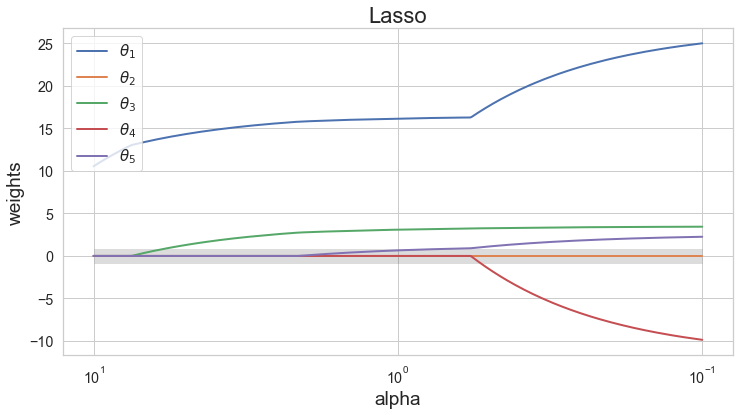

In [84]:
draw_track(model_r, X_train, y_train, -1.5, 5, 200, title='Ridge')
draw_track(model_l, X_train, y_train, -1, 1, 400, title='Lasso')
draw_track(model_e, X_train, y_train, -2, 2, 200, title='ElasticNet')

Посмотрим на зависимость моделей от параметра регуляризации:
- Ridge при не слишком больших alpha считает, что больше всего на целевую переменную влиет первый признак, но при этом учитывает и другие признаки, зануляя их все ближе к $\alpha=10^4$.
- Lasso постепенно зануляет веса у всех признаков, кроме первого, при меньших $\alpha$, при больших зануляет и  первый признак (соответствует свойствам Lasso об отборе признаков)
- ElasticNet же не при увеличении параметра сводит все признаки к нулю, но при больших $\alpha$ это напоминает Ridge-регрессию.

Исследуем зависимость от параметра `l1_ratio` для Elastic

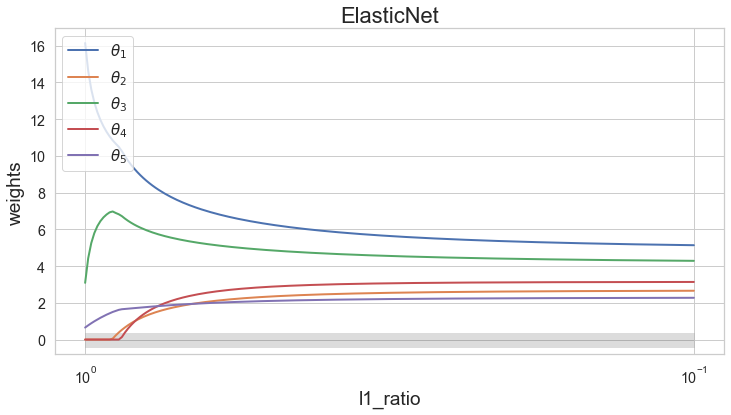

In [85]:
model_e = ElasticNet(fit_intercept=True, l1_ratio=0.3)
draw_track(model_e, X_train, y_train, -1, 0, 200, title='ElasticNet', dep='l1r', param='l1_ratio')

Можно заметить, что при стремлении l1_ratio к 1 у нас происходит зануление 2 из 5 признаков. При маленьких же значениях ни один признак не зануляется.  
Вспомним, что коэффициент l1_ratio влияет на то, какой норме в регуляризации мы отдает приоритет: l1 или l2. Т.е. наблюдаемые свойства как раз показывает, что чем больший приоритет отдаем l1-норме, тем быстрее зануляются признаки.

Расчитайте индекс обусловленности для случая линейной регрессии. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

Индекс обусловленности для линейной регрессии:

In [86]:
eigen_values = np.linalg.eig(np.linalg.inv(X_train.T @ X_train))[0]
print(np.sqrt(eigen_values.max() / eigen_values.min()))

13806.280651940338


Можем заметить, что число обусловленности огромно, значит скорее всего данные мультиколлинеарны.

Построим график зависимости индекса обусловленности от параметра регуляризации для Ridge-регрессии:

In [87]:
def draw_cond_num_dependency(X, log_min, log_max, num, figsize=(12, 6)):
    '''
    Строит график зависимости индекса обусловленности от параметра регуляризации
    в Ridge-регрессии
    
    Параметры:
        X - выборка
        y - значения целовой переменной, соответствующие матрице X
        num - размер разбиения (log_min, log_max)
        figsize - размер построенного графика
    '''
    alphas = np.logspace(log_min, log_max, num)  # 10 ** t, t in interval  
    indexes = []
    for a in alphas:
        eigen_values = np.linalg.eig(np.linalg.inv(X_train.T @ X_train + a * np.ones(X.shape[1])))[0]
        indexes.append(np.sqrt(eigen_values.max() / eigen_values.min()))

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ax.plot(alphas, indexes, linewidth=2)

    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha', fontsize=19)
    plt.ylabel('condition number', fontsize=19)
    plt.title("Зависимость числа обусловленности от alpha в Ridge", fontsize=22)
    plt.axis('tight')
    plt.show()

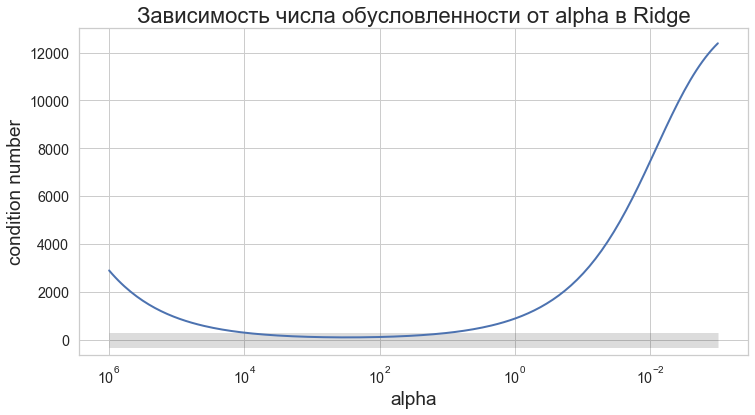

In [88]:
draw_cond_num_dependency(X_train, -3, 6, 200)

Можно заметить, что минимум индекса обусловленности достигается при $\alpha$ порядка $10^2$.

**3.** С помощью кросс-валидации определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

GridSearchCV по умолчанию использует 5-fold кросс-валидацию, поэтому мы можем просто использовать его.  
Во избежание попадания в трейновую выборку информации о валидационной, нам будет нужно использовать стандартизацию уже после разбиения.

Разобьем исходные данные на train и test

In [289]:
X = data.iloc[:, :-1] # так быстрее, чем просто подставить колонки нужные
y = data["Groceries Index"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=None)

Найдем поиском по сетке оптимальные параметры для ridge и lasso

In [290]:
def grid_search_custom(pipeline, param_grid, model_nm='model'):
    grid_search = GridSearchCV(pipeline, 
                               param_grid=param_grid, 
                               scoring = 'neg_mean_squared_error',
                               n_jobs=-1
                              )
    grid_search.fit(X_train, y_train)
    print(model_nm)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('\n')
    return grid_search.best_params_

Создадим модели

In [291]:
model_r = Ridge(fit_intercept=True)
model_l = Lasso(fit_intercept=True)
model_e = ElasticNet(fit_intercept=True)

In [292]:
###################### RIDGE ########################
pipeline = Pipeline([('scale', StandardScaler()),
                     ('clf', model_r)])

param_grid = {'clf__alpha' : np.linspace(0, 0.1, 100)}
    
ridge_params = grid_search_custom(pipeline, param_grid, 'ridge')

###################### LASSO ########################

pipeline = Pipeline([('scale', StandardScaler()),
                     ('clf', model_l)])

param_grid = {'clf__alpha' : np.linspace(1e-6, 0.1, 1000)}

lasso_params = grid_search_custom(pipeline, param_grid, 'lasso')

###################### ELASTIC ######################

pipeline = Pipeline([('scale', StandardScaler()),
                     ('clf', model_e)])

param_grid = {'clf__alpha' : np.linspace(0.00001, 0.01, 100),
             'clf__l1_ratio': np.linspace(0.001, 1, 50)}

elastic_params = grid_search_custom(pipeline, param_grid, 'elastic')

ridge
Best score: -35.425389306974964
Best parameters: {'clf__alpha': 0.011111111111111112}


lasso
Best score: -35.42514235591665
Best parameters: {'clf__alpha': 0.0001010990990990991}


elastic
Best score: -35.424111041611084
Best parameters: {'clf__alpha': 0.0011200000000000001, 'clf__l1_ratio': 1.0}




На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

Оптимальные модели:

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=None)

scaler = StandardScaler()
X_train = scaler.fit(X_train).transform(X_train)

model_r = Ridge(fit_intercept=True, alpha=ridge_params["clf__alpha"])
model_l = Lasso(fit_intercept=True, alpha=lasso_params["clf__alpha"])
model_e = ElasticNet(fit_intercept=True, 
                     alpha=elastic_params["clf__alpha"], 
                     l1_ratio=elastic_params["clf__l1_ratio"])

In [285]:
X_train.shape

(378, 5)

Обучим

In [296]:
model_r.fit(X_train, y_train)
model_l.fit(X_train, y_train)
model_e.fit(X_train, y_train)

print("Ridge coefs: ", model_r.coef_)
print("Lasso coefs: ", model_l.coef_)
print("Elastic coefs: ", model_e.coef_)

Ridge coefs:  [ 21.99672408  -3.73128745  11.56887814 -11.90600258   2.53616034]
Lasso coefs:  [ 29.43938252   2.04805807  -0.94364491 -11.91367325   2.53649483]
Elastic coefs:  [ 29.3289142    1.98123163  -0.79340963 -11.89238837   2.53335127]


Для получения предсказаний на тесте, нам нужно сначала стандартизировать тестовые данные с помощью посчитанных средних и дисперсии для train. Это нужно сделать, чтобы наша модель не получили какие-то данные о тесте, как это было бы, если бы мы нормировали test только на тесте.

In [143]:
X_test = scaler.transform(X_test)

In [144]:
def model_mse(model, X, y, label=''):
    y_pred = model.predict(X)
    print(label, mean_squared_error(y_pred, y))
          
model_mse(model_r, X_test, y_test, label='ridge')
model_mse(model_l, X_test, y_test, label='lasso')
model_mse(model_e, X_test, y_test, label='elastic')

ridge 31.746985072009803
lasso 31.74592975794261
elastic 31.74689135428803


Как видно, все предсказания примерно одинаковые по качеству, но lasso - наилучшая. При этом если посмотреть на коэффициенты, то видны различия между ridge и оставшимися двумя, т.е. lasso здесь предсказывает

**4.** Исследуйте остатки модели Ridge-регрессии. Можно ли говорить о гомоскедастичности. Если нет, попытайтесь несложными преобразованиями признаков и отклика визуально прийти к гомоскедастичности.

Считаем остатки на тех данных, на которых обучались

In [145]:
eps = model_r.predict(X_train) - y_train

185    -1.522374
473     1.956374
124    -2.686089
154    14.618985
281    -0.474315
         ...    
70      8.399267
277     0.463819
9      -6.473844
359     3.546795
192    13.911415
Name: Groceries Index, Length: 378, dtype: float64

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=None)

Построим зависимость остатков от признаков

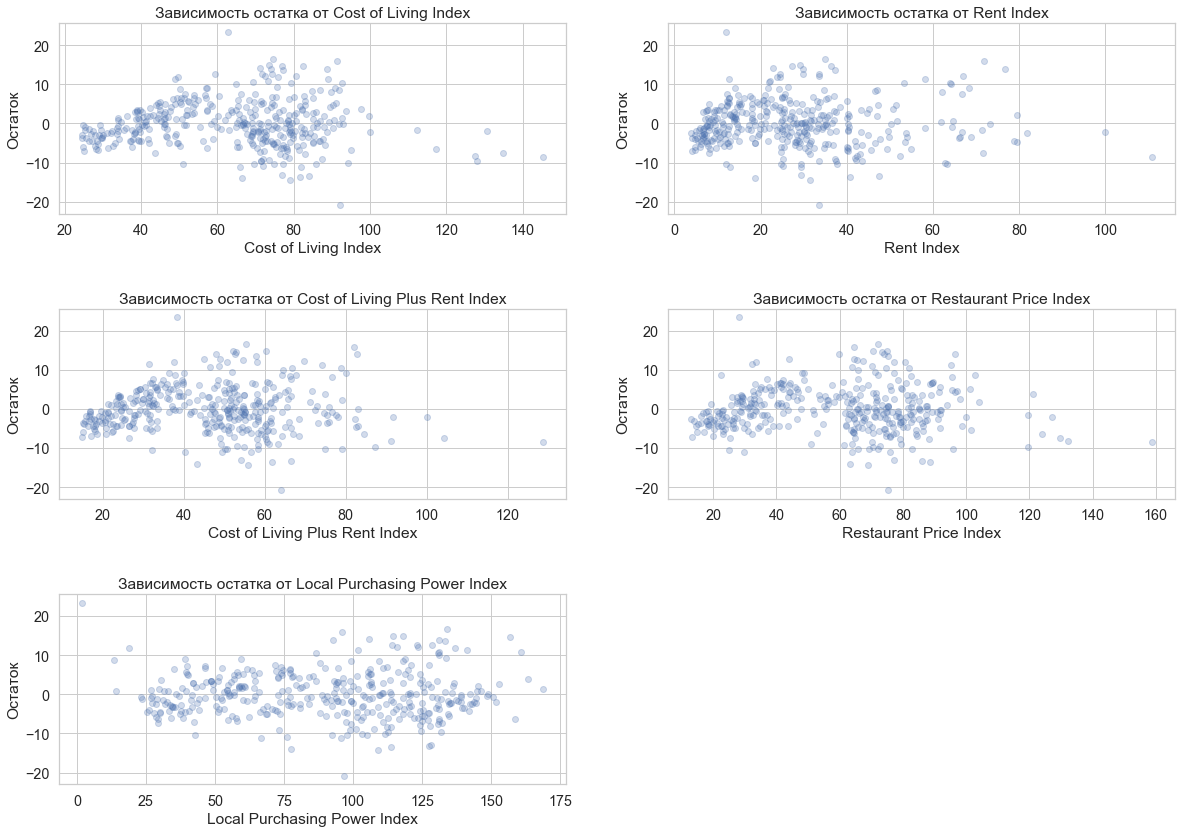

In [383]:
column_names = X_train.columns

plt.figure(figsize=(20, 14))

for i, name in enumerate(column_names):
    plt.subplots_adjust(hspace = 0.5)
    plt.subplot(len(column_names) / 2 + 1, 2, i + 1)
    plt.scatter(X_train[name], eps, alpha=0.25)
    plt.title('Зависимость остатка от {}'.format(name))
    plt.xlabel(name)
    plt.ylabel('Остаток')
plt.show()

Как видно, у нас гетероскедастичность по всем признакам. Для улучшения ситуации - прологарифмируем.

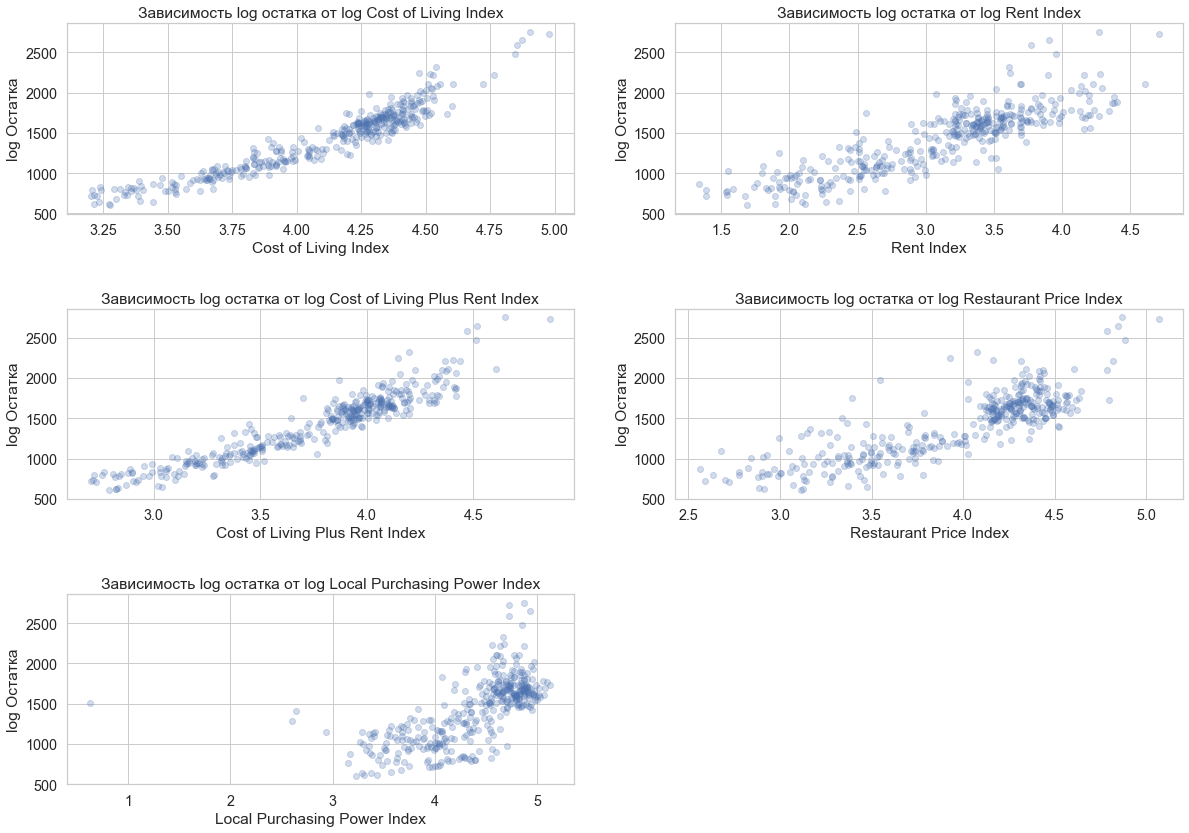

In [384]:
column_names = X_train.columns

plt.figure(figsize=(20, 14))

for i, name in enumerate(column_names):
    plt.subplots_adjust(hspace = 0.5)
    plt.subplot(len(column_names) / 2 + 1, 2, i + 1)
    plt.scatter(np.log(X_train[name]), model_r.predict(X_train), alpha=0.25)
    plt.title('Зависимость log остатка от log {}'.format(name))
    plt.xlabel(name)
    plt.ylabel('log Остатка')
plt.show()

Визуально видно, что в каждой x-точке графика примерно одинаковая y-ширина, по которой расположены log_eps.

С помощью модели Ridge-регрессии постройте предсказательный интервал для наблюдаемого отклика уровня доверия 0.95. Какой смысл имеет этот интервал? В чем его отличие от доверительного интервала? Посчитате долю точек выходящих за предсказательный интревал.

Предпосчитаем параметры.

In [417]:
X_tr = np.hstack((np.expand_dims(np.ones(X_train.shape[0]), axis=1), X_train))
reg_coef = np.hstack((np.array(model_r.intercept_), model_r.coef_))

y_pred = model_r.predict(StandardScaler().fit_transform(X_train))

n = X_tr.shape[0]
d = X_tr.shape[1]

b = (n - d) / np.sum((y_pred - y_train) ** 2) 
a = reg_coef * b
sigma = np.linalg.inv((b * X_tr.T @ X_tr + a @ np.eye(d)))

In [418]:
left = []
right = []

for x0 in X_tr:
    distr = sps.norm(b * x0.T @ sigma @ X_tr.T @ y_train, np.sqrt(x0.T @ sigma @ x0 + 1 / b))
    left.append(distr.ppf(0.975).ravel())
    right.append(distr.ppf(0.025).ravel())

Для наглядности и проверки собственного года построим графики предиктивных интервалов:

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=None)

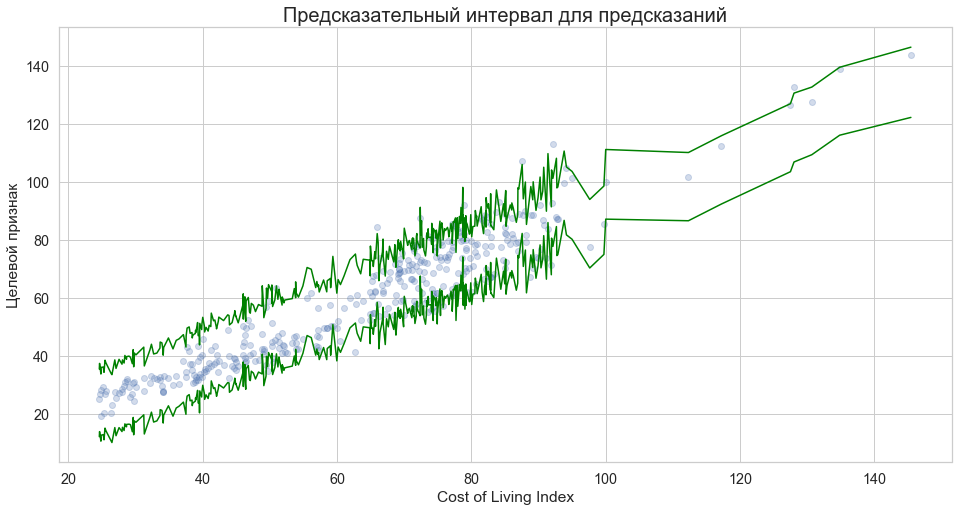

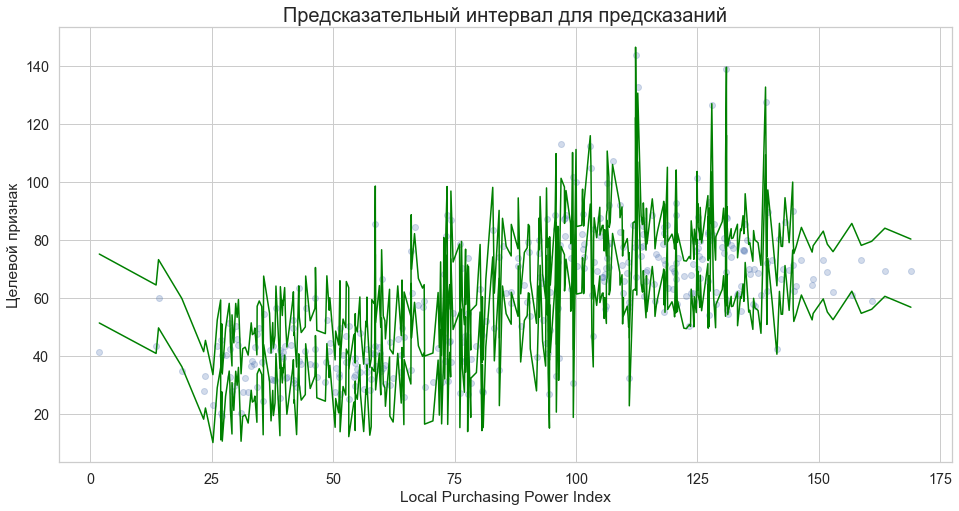

In [421]:
column_names = X_train.columns

for i, name in enumerate(column_names):
    X_train_column_sorted_i = np.argsort(X_train[name])
    
    plt.figure(figsize=(16, 8))
    plt.scatter(np.array(X_train[name])[X_train_column_sorted_i],
                np.array(y_train)[X_train_column_sorted_i], alpha=0.25)
    plt.plot(np.array(X_train[name])[X_train_column_sorted_i], 
             np.array(left)[X_train_column_sorted_i], color='green')
    plt.plot(np.array(X_train[name])[X_train_column_sorted_i], 
             np.array(right)[X_train_column_sorted_i], color='green')
    plt.title('Предсказательный интервал для предсказаний', fontsize=20)
    plt.xlabel(name)
    plt.ylabel('Целевой признак')
    
plt.show()

Посмотрев на графики, можно точно увидеть, что большинство точек попадает в предсказательный интервал $\Rightarrow$ мы молодцы.

Посчитаем, сколько из точек train-а попадают в свой предсказательный интервал.

In [423]:
num = 0;
y_train = np.array(y_train)

for i in range(len(y_train)):
    if (y_train[i] < left[i][0]) and (y_train[i] > right[i][0]):
        num += 1
        
print("В свой предсказательный интервал попадают {} точек из {}"
      .format(num, X_train.shape[0]))
print("Доля непопадающих точек: {}"
      .format(1 - num /X_train.shape[0]))

В свой предсказательный интервал попадают 354 точек из 378
Доля непопадающих точек: 0.06349206349206349


Аналогично для test

In [424]:
X_t = np.hstack((np.expand_dims(np.ones(X_test.shape[0]), axis=1), X_test))

left = []
right = []

for x0 in X_t:
    distr = sps.norm(b * x0.T @ sigma @ X_tr.T @ y_train, np.sqrt(x0.T @ sigma @ x0 + 1 / b))
    left.append(distr.ppf(0.975).ravel())
    right.append(distr.ppf(0.025).ravel())

In [425]:
num = 0;
y_test = np.array(y_test)

for i in range(len(y_test)):
    if (y_test[i] < left[i][0]) and (y_test[i] > right[i][0]):
        num += 1
        
print("В свой предсказательный интервал попадают {} точек из {}"
      .format(num, X_test.shape[0]))
print("Доля непопадающих точек: {}"
      .format(1 - num /X_test.shape[0]))

В свой предсказательный интервал попадают 153 точек из 162
Доля непопадающих точек: 0.05555555555555558


Отличие предсказательного интервала от доверительного: доверительный интервал мы строим для среднего значения отклика на объекте, предсказательный же - для наблюдаемого.

**5.** Сделайте общий вывод по задаче.

Сначала сделаю самый важный вывод. На примере этой задачи я научился внимательности. Получив MSE порядка $10^{-4}$ я засомневался в правильности, и начал проверять каждую строчку кода, абсолютно каждую, ни одно изменение не меняло результат. Спустя 4-5 часов, я случайно посмотрел на то, какой столбец я брал за целевой. Это был не тот столбец. Конец.

Оказалось, это не конец. Спустя пару часов я забыл стандартизировать train, и не мог даже подумать, что ошибка связана с этим местом(

#### О самой задаче:
- Были рассмотрены 3 вида регрессий, для каждой из которых мы выбирали оптимальный параметр поиском по сетке, в результате MSE всех трех моделей с оптимальными параметрами оказалось очень близко
- Несмотря на сильную мультиколлинеарность, коэффициент при регуляризаторе оказывался достаточно маленьким, но отличным от нуля
- Еще раз рассмотрели свойство о занулении признаков Lasso-регрессией
- Рассмотрели пример гетероскедастичных признаков, смогли перейти к (хотя бы визуальной) гомоскедастичности.
- Рассмотрели регуляризацию в байесовском подходе, на примере этой задачи увидели, что построенный по формуле с лекции предиктивный интервал имеет уровень значимость 0.95.